<a href="https://colab.research.google.com/github/ALL-Rodrigues/Topicos_Avancados/blob/main/Notebooks/Aula06_21_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sexta Aula de Tópicos Avançados

## manipulação de Imagens

### Exercicio 01

-- exercicio de manipulação de imagem.

-- calculo do tamanho da imagem .

-- original e cinza.

In [ ]:
import cv2
import numpy as np

#carregar uma imagem (substitua pelo caminho da sua imagem)
from google.colab import files

uploaded = files.upload()

# pegar o nome do arquivo carregado
image_path = list(uploaded.keys())[0]

# Ler a imagem usando OpenCV
image = cv2.imread(image_path)

#varificar se a imagem foi carregada corretamente
if (image is None):
  print("Erro ao carregar a imagem. Verifique o arquivo e o caminho")
else:
  #obter as dimensões da imagem (altura, largura, canais)
  altura, largura, canais = image.shape

  # obter o tipo de dado da imagem
  tipo_dado = image.dtype

  # calcular o tamanho do tipo de dado em bytes
  if (tipo_dado == np.uint8):
    bytes_por_canal = 1 # 1 por canal (8 bites)
  elif tipo_dado == np.float32:
    bytes_por_canal = 4 # 4 bytes pior canal (32 bites)
  else:
    raise ValueError("Tipo de dado da imagem não suportado")

  #calcular o tamanho da imagem em bytes manualmnete (3 canis)
  tamanho_bytes_3canais = altura * largura * canais * bytes_por_canal

  #exibir os resultados para a imagem de 3 canais
  print("\n\n=== Imagem de 3 Canis (RGB) ===")
  print(f"Largura da imagem: {largura} pixels")
  print(f"Altura da imagem: {altura} pixels")
  print(f"canais da imagem: {canais} pixels")
  print(f"Tipo de dado da imagem: {tipo_dado} pixels")

  print(f"Tamanho da imagem em bytes (calculo manual): {tamanho_bytes_3canais} bytes")
  print(f"Tamanho da imagem em bytes (OpenCV): {image.nbytes} bytes")

  #calcular a imagem para escala de cinza (1 canal)
  imagem_cinza = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  #converter a imagem para a escala de cinza (1 canal)
  altura_cinza, largura_cinza = imagem_cinza.shape
  canais_cinza = 1 # a imagem em escala de cinza tem apenas 1 canal

  #calcular o tamanho da imagem em bytes manualmentes (1 canal)
  tamanho_bytes_1canal = altura_cinza * largura_cinza * canais_cinza * bytes_por_canal

  # Exibir os resultados para a imagem de 1 canal
  print("\n\n=== Imagem de 1 canal (escala de Cinza) ===")
  print(f"Largura da imagem: {largura_cinza} pixels")
  print(f"Altura da imagem: {altura_cinza} pixels")
  print(f"Numero de Canais da imagem: {canais_cinza} pixels")
  print(f"Tipo de dado da imagem: {tipo_dado} pixels")
  print(f"Tamanho da imagem em bytes (Calculo manual): {tamanho_bytes_1canal} bytes")
  print(f"Tamanho da imagem em bytes (OpenCV): {imagem_cinza.nbytes} bytes")




Saving lena_color_128_128_.jpg to lena_color_128_128_ (7).jpg


=== Imagem de 3 Canis (RGB) ===
LArgura da imagem: 256 pixels
Altura da imagem: 256 pixels
canais da imagem: 3 pixels
Tipo de dado da imagem: uint8 pixels
Tamanho da imagem em bytes (calculo manual): 196608 bytes
Tamanho da imagem em bytes (OpenCV): 196608 bytes


=== Imagem de 1 canal (escala de Cinza) ===
Largura da imagem: 256 pixels
Altura da imagem: 256 pixels
Numero de Canais da imagem: 1 pixels
Tipo de dado da imagem: uint8 pixels
Tamanho da imagem em bytes (Calculo manual): 65536 bytes
Tamanho da imagem em bytes (OpenCV): 65536 bytes


## exercicio 02

-- testando desenhar formas na tela

Imagem com desenhos


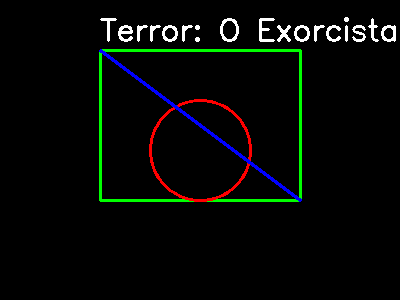

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

altura  = 300
largura = 400
canais = 3

#criar uma imagem preta (todos os pixels com valor 0)
img = np.zeros((altura, largura, canais), dtype=np.uint8)

#desenha um retangulo
cv2.rectangle(img, (100, 50), (300, 200), (0, 255, 0), 2) # retangulo verde

#desenhar um circulo
cv2.circle(img, (200, 150), 50, (0,0,255), 2) #circulo verde

#desenhar uma linha
cv2.line(img, (100, 50), (300, 200), (255, 0, 0), 2) # linha

# adicionar texto
cv2.putText(img, "Terror ", (100, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

#EXIBIR IMAGEM
print("Imagem com desenhos")

cv2_imshow(img)

## exercicio 03

-- Cortando a imagem



Saving riuori.jpg to riuori (2).jpg


Imagem Original: 


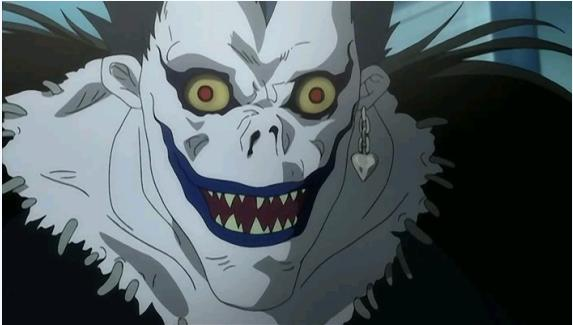



Imagem Cortada: 


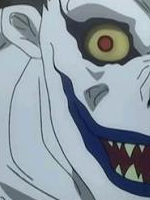

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
img = cv2.imread(file_name)

if(img is None):
  print("Erro: Não foi possivel carregar a imagem. ")
else:
  # definir as cordenadas e dimensões do recorte
  x, y = 100, 50  # ponto inicial (canto superior esquerdo
  a, b = 200, 150 # largura e altura do recorte)

  #recortar a imagem
  crop = img[y:y+a, x:x+b]

  #exibir as imagens no google colab
  print("\n\nImagem Original: ")
  cv2_imshow(img)

  print("\n\nImagem Cortada: ")
  cv2_imshow(crop)

## Exercicio 04

-- algo a anotar


Saving bolas_cores.jpg to bolas_cores (6).jpg


Imagem Original: 


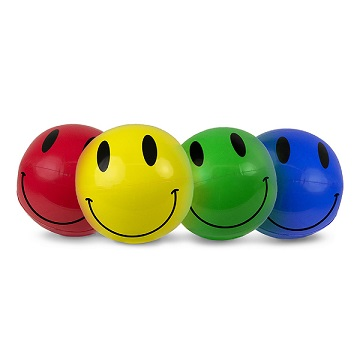



Mascara (Azul): 


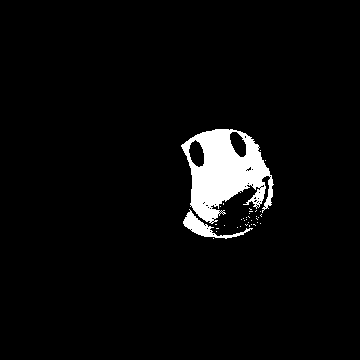



Resultado final: 


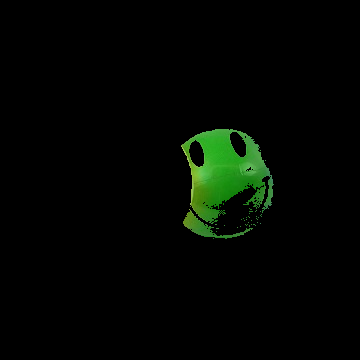

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import  files
uploaded = files.upload()
file_name = list(uploaded.keys())[0] # pega o nome do arquivo carregado
frame = cv2.imread(file_name)

# Converter a imagem para o espaço de cores HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

#definir os intervalos de cor para a cor azul
lower_blue = np.array([110, 127, 127]) # 110 valor do primeiro que foi alterado
upper_blue = np.array([130, 255, 255]) # 130 valor do primeiro que foi alterado

#mask criar uma mascara para a cor azul
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# aplicae a mascara a imagem origial
res = cv2.bitwise_and(frame, frame, mask=mask)

#exibir a imagemm no google colab
print("\n\nImagem Original: ")
cv2_imshow(frame)

print("\n\nMascara (Azul): ")
cv2_imshow(mask)

print("\n\nResultado final: ")
cv2_imshow(res)

#taubate = np.concatenete((mask, res) axis=1)
#cv2_imshow(taubate)

## exercicio 05

-- algo para escrever

Saving face_a.jpg to face_a.jpg
Imagem Original: 


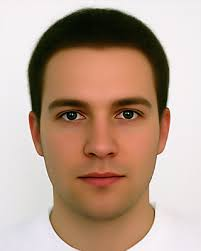



Imagem Redimensionda (menor): 


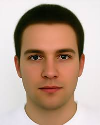



Imagem Redimensionda (maior): 


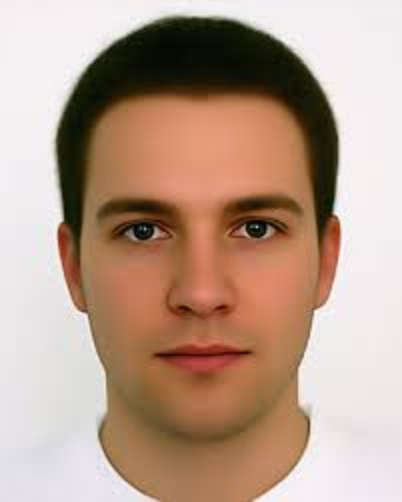

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import  files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

img = cv2.imread(image_path)

print("Imagem Original: ")
cv2_imshow(img)

# redirecionar para um tamanho menor
altura, largura = img.shape[:2] # o erro tava na falta do "=" e "." que nao tinha ou que foi substituido por "_"

nova_largura_menor = int(largura * 0.5)
nova_altura_menor = int(altura * 0.5)
img_menor = cv2.resize(img,(nova_largura_menor, nova_altura_menor))

print("\n\nImagem Redimensionda (menor): ") # exibe a imagem (menor)
cv2_imshow(img_menor)

nova_largura_maior = int(largura * 2)
nova_altura_maior = int(altura * 2)
img_maior = cv2.resize(img,(nova_largura_maior, nova_altura_maior))

print("\n\nImagem Redimensionda (maior): ") # exibe a imagem (maior)
cv2_imshow(img_maior)